In [1]:
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
from torchvision.datasets import CIFAR10
import torch.nn as nn
import data_utils

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
plt.rcParams.update({'font.size': 12})
device

device(type='cuda')

In [3]:
DATA_DIR = '/datasets/cv_datasets/data'
ds_train = CIFAR10(root=DATA_DIR, download=True, train=True, transform=None)
ds_test = CIFAR10(root=DATA_DIR, download=True, train=False, transform=None)
dl_train, dl_val, dl_test = data_utils.get_data_loaders(train_dataset=ds_train, test_dataset=ds_test, batch_size=64)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
from cifar10 import encoder, classifier

encoder = encoder.encoder_cifar()
classifier = classifier.ClassifierCifar()
model = nn.Sequential(encoder, classifier).to(device)

/home/omer.trinin/miniconda3/envs/cs236781-hw/lib/python3.8/site-packages/pl_bolts/__init__.py:11: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, tp_name):
/home/omer.trinin/miniconda3/envs/cs236781-hw/lib/python3.8/site-packages/pl_bolts/__init__.py:11: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, tp_name):
/home/omer.trinin/miniconda3/envs/cs236781-hw/lib/python3.8/site-packages/pl_bolts/models/self_supervised/amdim/amdim_module.py:34: UnderReviewWarning: The feature generate_power_seq is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  "lr_options": generate_power_seq(LEARNING_RATE_CIFAR, 11),
/home/omer.trinin/minicon

--- EPOCH 1/50 ---
100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 704/704 [00:43<00:00, 16.25it/s]
Train loss: 1.6522527540271932, accuracy: 39.19344815340909
100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 58.69it/s]
Validation loss: 1.4654752016067505, accuracy: 47.745253164556964
Best model saved at epoch 1 with validation loss: 1.4654752016067505
--- EPOCH 2/50 ---
100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 704/704 [00:43<00:00, 16.23it/s]
Train loss: 1.4005159083753824, accuracy: 49.89124644886363
100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 79/79 [00:01<00:00, 58.29it/s]
Validation loss: 1.22889407224293, accuracy: 56.36867088607595
Best model saved at epoch 2 with validation loss: 1.22889407224293
--- EPOCH 3/50 ---
100%|█████

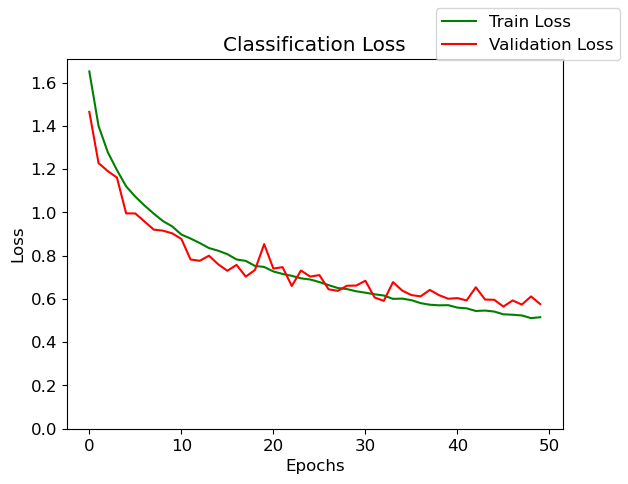

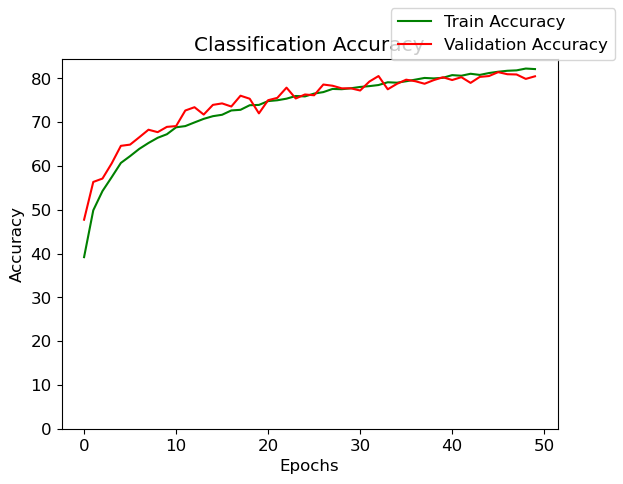

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 157/157 [00:02<00:00, 57.96it/s]
Test loss: 0.5859923470931448, accuracy: 80.42396496815287
Amazing!!!


In [5]:
import training

try:
    encoder.load_state_dict(torch.load('saved_models/encoder_supervised_cifar.pth'))
    classifier.load_state_dict(torch.load('saved_models/classifier_supervised_cifar.pth'))
except:
    optimizer = torch.optim.Adam(model.parameters(), lr=5e-4)
    loss_fn = nn.CrossEntropyLoss()
    transform = transforms.Compose([
        transforms.RandomResizedCrop(32, scale=(0.5, 1.0)),
        transforms.RandomHorizontalFlip(p=0.5),
    ])
    normalize = transforms.Normalize(mean=[0.49139968, 0.48215841, 0.44653091], std=[0.24703223, 0.24348513, 0.26158784])

    trainer = training.ClassifierTrainer(model=model,
                                        optimizer=optimizer,
                                        loss_fn=loss_fn,
                                        device=device,
                                        transform=transform,
                                        normalize=normalize)
    trainer.train(num_epochs=50, dl_train=dl_train, dl_val=dl_val)
    trainer.test(dl_test)
    
    torch.save(encoder.state_dict(), 'saved_models/encoder_supervised_cifar.pth')
    torch.save(classifier.state_dict(), 'saved_models/classifier_supervised_cifar.pth')

In [6]:
from utils import plot_tsne

plot_tsne(model=encoder, dataloader=dl_test, device=device, name='supervised_cifar10')